In [51]:
import import_ipynb
import GenerateData
from GenerateData import Data
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import pinv

In [86]:
class PolynomialRegeression:
    '''
    Basic Class for Polynomial Regression to compare different paramaters and different approaches
    (using vs not using l2 regularization) 
    '''
    def __init__(self, deg = 1, GD = True):
        '''
        Constructor
        
        Params
        ======
            deg (int): degree of fit for model
            GD (bool): determines whether model should be fit using gradient descent or the normal equation
                       pinv(transpose(X).dot(X)).dot(transpose(X)).dot(y) ---- Pinv as we need to handle 
                       singular matrix case
        '''  
        self.w = []             #Weight Vector
        self.degree = deg       #Degree of polynomial
        self.gradient_desc = GD #Gradient Descent to compute paramaters
    
    def preprocessPolynomialFeatures(self, X):
        '''
        Function to preprocess X features to desired degree of fit
        
        Params
        ======
            X (array): Input features
        '''
        newX = [None]*len(X)
        temp = self.degree + 1
        for idx, i in enumerate(X):
            newX[idx] = [1.0, i[0]]
            for j in range(2, temp):
                newX[idx].append(math.pow(newX[idx][1], j))
        
        return newX
        
    
    def predict(self, X):
        '''
        Function to predict, runs y(x, w)
        
        Params
        ======
            X (1D-Array): 1 Tuple of features
        '''
#         result = 0
        result = self.w.dot(X)
        return result
    
    def cost_function(self, X, y):
        '''
        Calculating Sum of Square Error
        
        Params
        ======
            X (2D-Array): List of data-points by features
            y (1D-Array): List of targets
        '''
        predictions = []
        
        for i in X:
            predictions.append(self.predict(i)) #Get predictions
        
        predictions = np.array(predictions)
        
        sq_error = (predictions - y)**2 #Calculate square error
        
        return 1/(2*len(X))*sq_error.sum() 
    
    def visualizeData(self, X, y):
        '''
        Plotting data
        '''
        pred = []
        x = [i/len(X) for i in range(0, len(X))]
        for i in X:
            pred.append(self.predict(i))
        plt.scatter(x,y, c='b')
        plt.scatter(x,pred, c='r')
        plt.show()
        
    def fit(self, X, y):
        '''
        Computing Paramaters
        
        Params
        ======
            X (2D-Array): List of data-points by features
            y (1D-Array): List of targets
        '''
        if len(X) == 0 or len(X[0]) == 0:
            raise ValueError('X must have a shape greater than 0 columns or 0 rows') 
        
        if len(X) != len(y):
            raise ValueError('X and y must have the same number of rows')
        
        self.w = np.random.randn(len(X[0])) #+1 for bias
        print(self.w)
        print(self.cost_function(X, y))
        if self.gradient_desc:
            alpha = 0.001
            tolerance = 1e-10
            decay = 0.1
            cntr = 0
            while True:
                prevCost = self.cost_function(X, y)
                
                for index, i in enumerate(X):
                    new_Weights = [None]*len(self.w) #initialize array to be length of weight array
                    for idx in range(0, len(i)):
                        #New Weight = Weight - ALPHA*[derivative(Cost_Function) wrt w[idx]]
                        #Weights need to be update independently of each other
                        new_Weights[idx] = self.w[idx] - alpha*(self.w.dot(i) - y[idx])*X[index][idx]
                    
                self.w = np.array(new_Weights)
                cost = self.cost_function(X, y)
                cntr += 1
                print("Counter: ", cntr, "Cost: ", cost)
                if cntr % 100 == 0:
                    self.visualizeData(X, y)
                if prevCost - cost < tolerance:
                    break
        
        else:
            X = np.array(X)
            y = np.array(y)
            self.w = pinv(X.transpose().dot(X)).dot(X.transpose()).dot(y)
            
        self.visualizeData(X, y)
        print(self.w)
        
                            
    

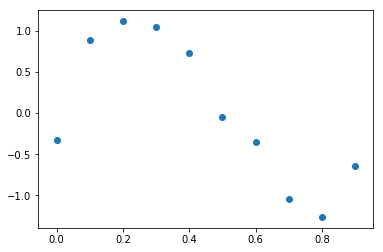

[[0.0], [0.1], [0.2], [0.3], [0.4], [0.5], [0.6], [0.7], [0.8], [0.9]]
[[1.0, 0.0, 0.0, 0.0], [1.0, 0.1, 0.010000000000000002, 0.0010000000000000002], [1.0, 0.2, 0.04000000000000001, 0.008000000000000002], [1.0, 0.3, 0.09, 0.026999999999999996], [1.0, 0.4, 0.16000000000000003, 0.06400000000000002], [1.0, 0.5, 0.25, 0.125], [1.0, 0.6, 0.36, 0.21599999999999997], [1.0, 0.7, 0.48999999999999994, 0.3429999999999999], [1.0, 0.8, 0.6400000000000001, 0.5120000000000001], [1.0, 0.9, 0.81, 0.7290000000000001]]
(10, 4) 10
[-1.11333574 -0.17307145  1.12651993  1.27482221]
1.056977270110152


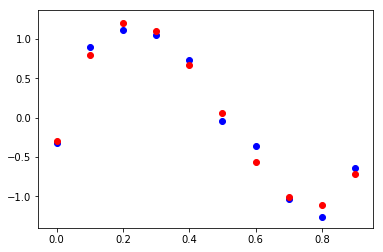

[ -0.30085576  14.85431043 -42.37608016  28.17449218]


In [91]:
if __name__ == "__main__":
    fx = Data()
    fx.generateTrainData()
    model = PolynomialRegeression(deg = 3, GD = False)
    print(fx.data['x'])
    X = model.preprocessPolynomialFeatures(fx.data['x'])
    y = fx.data['y']
    print(X)
    print(np.array(X).shape, len(y))
    model.fit(X, y)
